# Ex1

In [10]:
import numpy as np
import matplotlib.pylab as plt

In [29]:
# Função para plotar os curvas de nível constante de temperatura
def PlotaTemperature(n,m,T):
    x = np.arange(0, n, 1)
    y = np.arange(0, m, 1)
    X,Y=np.meshgrid(x,y)
    Z = np.copy(T)
    fig, ax = plt.subplots(figsize=(6,6))
    ax.set_aspect('equal')
    ax.set(xlabel='x', ylabel='y', title='Contours of temperature')
    im = ax.contourf(X, Y, Z.T, 20, cmap='jet')
    im2 = ax.contour(X, Y, Z.T, 20, linewidths=0.25, colors='k')
    fig.colorbar(im, ax=ax)
    plt.show()

## Método de Jacobi

In [78]:
# Numero de pontos em cada direcao
def Jacobi(N, tol):
    Told = np.zeros(shape=(N,N))
    
    # Temperaturas nas bordas
    Told[0,  :] = 0.0 # TL
    Told[N-1,:] = 0.0 # TR
    Told[:,  0] = 0.0 # TB
    Told[:,N-1] = 20.0 # TT
    
    # Loop de iteracoes
    Nmax = 10000
    Tnew = Told.copy()
    for iter in range(Nmax):
        Tnew[1:N-1,1:N-1] = 0.25*(Told[2:N,1:N-1] + Told[0:N-2,1:N-1] + \
                                  Told[1:N-1,2:N] + Told[1:N-1,0:N-2])
        
        error = np.linalg.norm(Tnew-Told)
        #print(iter, '  ', error)
        if(error < tol):
            #print('Converged in %d iterations\n' %(iter))
            break ;
            
        Told = Tnew.copy()
        
    #PlotaTemperature(N,N,Tnew)

    print(Tnew)
    return iter

## Método de Gauss-Seidel

In [31]:
# Numero de pontos em cada direcao
def Gauss_Seidel(N, tol):
    Told = np.zeros(shape=(N,N))

    # Temperaturas nas bordas
    Told[0,  :] = 0.0 # TL
    Told[N-1,:] = 0.0 # TR
    Told[:,  0] = 0.0 # TB
    Told[:,N-1] = 20.0 # TT
    
    # Loop de iteracoes
    Nmax = 10000
    Tnew = Told.copy()
    for iter in range(Nmax):
        for i in range(1,N-1):
            for j in range(1,N-1):
                Tnew[i,j] = 0.25*(Told[i+1,j] + Tnew[i-1,j] +\
                                  Told[i,j+1] + Tnew[i,j-1])
        
        error = np.linalg.norm(Tnew-Told)
        #print(iter, '  ', error)
        if(error < tol):
            #print('Converged in %d iterations\n' %(iter))
            break ;
            
        Told = Tnew.copy()
    
    #PlotaTemperature(N,N,Tnew)
    return iter

In [79]:
import tabulate as tb

tol = []
Ns = []
jacob = []
gauss = []

Jacobi(4, 1.0e-5)

for tolerancia in [1.0e-5, 1.0e-8]:
    for N in [11, 21, 41]:
        tol.append(tolerancia)
        Ns.append(N)
        jacob.append(Jacobi(N, tolerancia))
        gauss.append(Gauss_Seidel(N, tolerancia))

print(tb.tabulate(np.column_stack((Ns, tol, jacob, gauss)), headers=["N","Tolerância","Jacobi","Gauss-Seidel"], tablefmt="github", showindex="always"))

[[ 0.          0.          0.         20.        ]
 [ 0.          2.49999523  7.49999523 20.        ]
 [ 0.          2.49999523  7.49999523 20.        ]
 [ 0.          0.          0.         20.        ]]
[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.         20.        ]
 [ 0.          0.22149614  0.46612348  0.76053743  1.13996483  1.65772021
   2.40686455  3.57673346  5.61818511  9.77849653 20.        ]
 [ 0.          0.41986182  0.88246167  1.43606332  2.14160385  3.08405383
   4.39300669  6.28188611  9.1175118  13.49580173 20.        ]
 [ 0.          0.5754908   1.20780074  1.9596538   2.90633773  4.14388886
   5.79922659  8.04029595 11.07417691 15.08719992 20.        ]
 [ 0.          0.67430258  1.41360017  2.28841843  3.38021006  4.78594351
   6.61972049  9.00589924 12.05170345 15.77882296 20.        ]
 [ 0.          0.7081215   1.48388322  2.40021535  3.54014753  4.99996161
   6.88781958  9.3118827  12.34791898 15.976

# Ex2

In [74]:
def MetodoIterativo(x, Tol, Max_it, A, b):
    k = 0
    r = A*x - b
    M = np.diag(A)
    beta = 1
    while np.linalg.norm(r) > Tol and k < Max_it:
        d = np.linalg.solve(M,-r)
        x = x + beta*d
        r = A*x - b
        k += 1
        print(k, " -> ", r)

In [65]:
# Função para converter indice (i,j) a indice global Ic
def ij2n (i, j, N):
    return i + j*N

# Função para montar a matriz do sistema
def MatAssembly(N):
    nunk = N**2;
    A = np.zeros(shape=(nunk,nunk))
    for i in range(1,N-1):
        for j in range(1,N-1): 
            Ic = ij2n(i,   j,   N)
            Ie = ij2n(i+1, j,   N)
            Iw = ij2n(i-1, j,   N)
            In = ij2n(i,   j+1, N)
            Is = ij2n(i,   j-1, N)
            A[Ic,[Ic,Ie,Iw,In,Is]] = [4.0, -1.0, -1.0, -1.0, -1.0]
    return A

In [66]:
# Função para modificar a matriz e incorporar as condições de borda
def BuildSystem(A, N, TL, TR, TB, TT):
    nunk = N**2
    A = MatAssembly(N)
    Atilde = A.copy()
    b = np.zeros(shape=(nunk))
    k = np.array(range(0,N))
    Iden = np.identity(nunk)

    Ic = ij2n(0,k,N)
    Atilde[Ic,:], b[Ic] = Iden[Ic,:], TL # Tleft

    Ic = ij2n(N-1,k,N)
    Atilde[Ic,:], b[Ic] = Iden[Ic,:], TR # Tright

    Ic = ij2n(k,0,N)
    Atilde[Ic,:], b[Ic] = Iden[Ic,:], TB # Tbottom

    Ic = ij2n(k,N-1,N)
    Atilde[Ic,:], b[Ic] = Iden[Ic,:], TT # Ttop
    
    return Atilde, b

In [77]:
N = 4

A = MatAssembly(N)
Atilde, b = BuildSystem(A, N, TL=0, TR=0, TB=0, TT=20.0)

print(b)
teste = np.linalg.solve(Atilde,b)
print(teste)

MetodoIterativo(np.zeros(shape=len(b)), 1e-05, 1e04, Atilde, b)

[ 0.   0.   0.   0.   0.   2.5  2.5  0.   0.   7.5  7.5  0.  20.  20.
 20.  20. ]
160.0


LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

# Ex3

In [8]:
# Função para modificar a matriz e incorporar as condições de borda
def BuildSystemSim(N, TL, TR, TB, TT):
    nunk = N**2
    A = MatAssembly(N)
    Atilde = A.copy()
    b = np.zeros(shape=(nunk))
    k = np.array(range(0,N))
    Iden = np.identity(nunk)

    Ic = ij2n(0,k,N) # Tleft
    for r in k:
        b[:] = b[:] - A[:,Ic[r]]*TL 
        
    Atilde[Ic,:], b[Ic] = Iden[Ic,:], TL
    Atilde[:,Ic] = Iden[:,Ic]

    Ic = ij2n(N-1,k,N) # Tright
    for r in k:
        b[:] = b[:] - A[:,Ic[r]]*TR
        
    Atilde[Ic,:], b[Ic] = Iden[Ic,:], TR
    Atilde[:,Ic] = Iden[:,Ic]

    Ic = ij2n(k,0,N) # Tbottom
    for r in k:
        b[:] = b[:] - A[:,Ic[r]]*TB
        
    Atilde[Ic,:], b[Ic] = Iden[Ic,:], TB
    Atilde[:,Ic] = Iden[:,Ic]

    Ic = ij2n(k,N-1,N) # Ttop
    for r in k:
        b[:] = b[:] - A[:,Ic[r]]*TT
        
    Atilde[Ic,:], b[Ic] = Iden[Ic,:], TT
    Atilde[:,Ic] = Iden[:,Ic]
    
    return Atilde, b

A = 
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0. -1.  4. -1.  0.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0. -1.  4. -1.  0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0. -1.  4. -1.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  0. -1.  4. -1.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

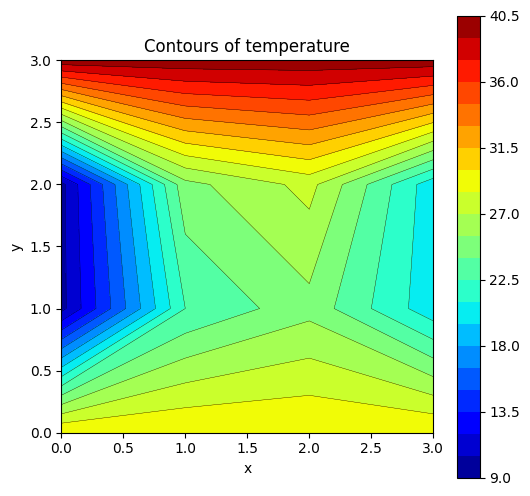

In [23]:
N = 4

A = MatAssembly(4)
Atilde, b = BuildSystem(A, N, TL=10.0, TR=20.0, TB=30.0, TT=40.0)

print("A = \n", A)
print("\nÃ = \n", Atilde, '\n\nb = \n', b)
print("\nÃ - Ã.T = ", np.linalg.norm(Atilde-Atilde.T))

print("\nPós-simetria: \n")

Atilde, b = BuildSystemSim(N, TL=10.0, TR=20.0, TB=30.0, TT=40.0)
print("Ã = \n", Atilde, '\n\nb = \n', b)
print("\nÃ - Ã.T = ", np.linalg.norm(Atilde-Atilde.T))

import scipy
from scipy.linalg import solve 

T = scipy.linalg.solve(Atilde,b)
Tplot = T.copy().reshape(N,N).T
PlotaTemperature(N,N,Tplot)

# Ex4